In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Spline cúbicos 

En este tipo de interpolación se considera que los puntos $(x_i, y_i)$ y $(x_{i + 1}, y_{i + 1})$ se unen por un polinomio cúbico de la forma

$$S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i $$

que es válido para $x_i \leq x \leq x_{i+1}$ para $i = 1, \ldots, n - 1$.

Para encontrar la función de interpolación, primero se deben  determinar los coeficientes $a_i, b_i, c_i, d_i$ para cada una de las funciones cúbicas. 

Para $n$ puntos, hay $n - 1$ funciones cúbicas para encontrar, y cada función cúbica requiere cuatro coeficientes. Por lo tanto, se tiene un total de $4 (n - 1)$ incógnitas, por lo que se necesita $4 (n - 1)$ ecuaciones independientes para encontrar todos los coeficientes.

Algunas consideraciones:

1. Las funciones cúbicas deben cruzar con los datos (los puntos de la izquierda y la derecha):

$$\begin{align*}
S_i(x_i) &= y_i,\, i = 1,\ldots,n-1\\
S_i(x_{i+1}) &= y_{i+1},\, i = 1,\ldots,n-1\\
\end{align*}$$


> esto da $2(n - 1)$ ecuaciones. 

2. Cada función cúbica se debe unir lo más suavemente posible con sus vecinas, por lo que las splines deben tener una primera y segunda derivadas continuas en los puntos de datos $i = 2, \ldots, n - 1$:

$$\begin{align*}
S^{'}_i(x_{i+1}) &= S^{'}_{i+1}(x_{i+1}),\, i = 1,\ldots,n-1\\
S^{''}_i(x_{i+1}) &= S^{''}_{i+1}(x_{i+1}),\, i = 1,\ldots,n-1\\
\end{align*}$$

> esto da $2(n - 2)$ ecuaciones.

Con todo esto, aún se requieren dos ecuaciones más para calcular los coeficientes de $Si (x)$. Estas dos últimas restricciones son arbitrarias; se pueden elegir para adaptarse a las circunstancias de la interpolación que se está realizando. Un conjunto común de restricciones finales es asumir que las segundas derivadas son cero en los puntos finales. Esto significa que la curva es una "línea recta" en los puntos finales, es decir

$$\begin{align*}
S^{''}_1(x_1) &= 0\\
S^{''}_{n-1}(x_n) &= 0
\end{align*}$$



Para determinar los coeficientes de cada función cúbica, se escriben las restricciones explícitamente como sistema de ecuaciones lineales con $4 (n - 1)$ incógnitas. Para $n$ puntos de datos, las incógnitas son los coeficientes $a_i, b_i, c_i, d_i$ del spline cúbico, $S_i$, uniendo los puntos $x_i$ y $x_{i + 1}$. 

Para las restricciones $S_i(x_i) = y_i$ se tiene:

$$\begin{align*}
a_1 x^3_1 + b_1 x^2_1 + c_1 x_1 + d_1&= y_1\\
a_2 x^3_2 + b_2 x^2_2 + c_2 x_2 + d_2&= y_2\\
\vdots\\
a_{n-1} x^3_{n-1} + b_{n-1} x^2_{n-1} + c_{n-1} x_{n-1} + d_{n-1}&= y_{n-1}\\
\end{align*}$$

Para las restricciones $S_i(x_{i+1}) = y_{i+1}$ se tiene:

$$\begin{align*}
a_1 x^3_2 + b_1 x^2_2 + c_1 x_2 + d_1&= y_2\\
a_2 x^3_3 + b_2 x^2_3 + c_2 x_3 + d_2&= y_3\\
\vdots\\
a_{n-1} x^3_{n} + b_{n-1} x^2_{n} + c_{n-1} x_{n} + d_{n-1}&= y_n\\
\end{align*}$$


Para las restricciones $S^{'}_i(x_{i+1}) = S^{'}_{i+1}(x_{i+1})$ se tiene:

$$\begin{align*}
3a_1 x^2_2 + 2b_1 x_2 + c_1 - 3a_2 x^2_2 - 2b_2 x_2 - c_2&= 0\\
3a_2 x^2_3 + 2b_2 x_3 + c_2 - 3a_3 x^2_3 - 2b_3 x_3 - c_3&= 0\\
\vdots\\
3a_{n-2} x^2_{n-1} + 2b_{n-2} x_{n-1} + c_{n-2} - 3a_{n-1} x^2_{n-1} - 2b_{n-1} x_{n-1} - c_{n-1}&= 0\\
\end{align*}$$

Para las restricciones $S^{''}_i(x_{i+1}) = S^{''}_{i+1}(x_{i+1})$ se tiene:

$$\begin{align*}
6a_1 x_2 + 2b_1 - 6a_2 x_2 - 2b_2&= 0\\
6a_2 x_3 + 2b_2 - 6a_3 x_3 - 2b_3&= 0\\
\vdots\\
6a_{n-2} x_{n-1} +2b_{n-2} - 6a_{n-1} x_{n-1} - 2b_{n-1} &= 0\\
\end{align*}$$

Finalmente, para las restricciones de punto final $S_1 (x_1) = 0$ y $S_{n −1} (x_n) = 0$, se tiene:

$$\begin{align*}
6a_1 x_1 + 2b_1 &= 0\\
6a_{n-1} x_n + 2b_{n-1} &= 0\\
\end{align*}$$

Estas ecuaciones son lineales en los coeficientes desconocidos $a_i, b_i, c_i\, \text{y}\, d_i$. Con los cuales se puede formar una matriz y encontrar los coeficientes de cada spline. 

Tip: Recordar que siempre que se tenga un sistema $A\boldsymbol{x} = \boldsymbol{b}$, para que éste tenga solución, $A$ debe ser cuadrada e invertible.

**Ejemplo** Interpolar con spline lineal los siguientes datos $(1,1), (2,0.5)$ y $(4,0.25)$.





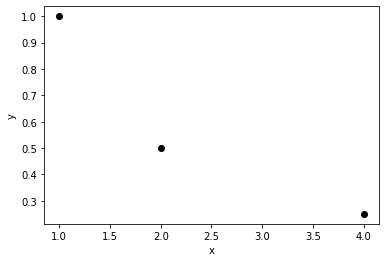

In [ ]:
x = [1, 2, 4]
y = [1,0.5,0.25]
plt.plot(x,y, "ko")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

El spline lineal tiene la forma $S(x) = ax+b$

> Para el intervalo $(1,1)$ y $(2,0.5)$

**Paso 1**: Construir el spline que une los puntos $(1,1)$ y $(2,0.5)$

$$S_1(x) = ax+b$$

$$\begin{align*}
a + b &= 1\\
2a + b &= 0.5
\end{align*}$$

**Paso 2**: Resolver el sistema anterior

$$\begin{align*}
a &= -0.5\\
b &= 1.5
\end{align*}$$

**Paso 3**: Sustituir $a=-0.5$ y $b = 1.5$  en $S_1(x)$

$$S_1(x) = -0.5x+1.5$$

> Para el intervalo $(2,0.5)$ y $(4,0.25)$

**Paso 1**: Construir el spline que une los puntos $(2,0.5)$ y $(4,0.25)$

$$S_2(x) = ax+b$$

$$\begin{align*}
4a + b &= 0.25\\
2a + b &= 0.5
\end{align*}$$

**Paso 2**: Resolver el sistema anterior

$$\begin{align*}
a &= -0.125\\
b &= 0.75
\end{align*}$$

**Paso 3**: Sustituir $a=-0.125$ y $b = 0.75$  en $S_2(x)$

$$S_2(x) = -0.5x+1.5$$

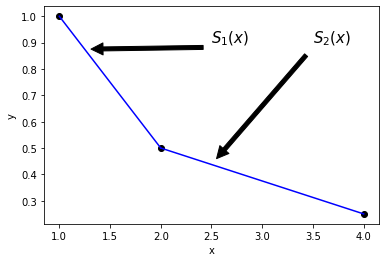

In [ ]:
S1x = lambda x: -0.5*x + 1.5  
S2x = lambda x: -0.125*x + 0.75
x = [1, 2, 4]
y = [1,0.5,0.25]
plt.plot(x,y, "ko")
plt.plot(np.linspace(1,2,10,endpoint=True),
         S1x(np.linspace(1,2,10,endpoint=True)),"b-")
plt.annotate(r"$S_1(x)$", xy=(1.25,S1x(1.25)), xytext=(2.5, 0.9),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.plot(np.linspace(2,4,10,endpoint=True),
         S2x(np.linspace(2,4,10,endpoint=True)),"b-")
plt.annotate(r"$S_2(x)$", xy=(2.5,S2x(2.5)), xytext=(3.5, 0.9),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Ejemplo**: Construya un spline cuadrático que pase por los puntos $(3.0,2.5), (4.5,1.0),(7.0,2.5)$ y $(9.0,0.5)$.

**Paso 1**: Construir los splines cuadráticos $S_i(x_i)= a_ix_i^2 + b_ix_i + c_i$. que pasen por los puntos.

> Para las restricciones $S_i(x_i) = y_i$ se tiene:

$$\begin{align*}
S_1(3.0) &= 2.5 = a_1(3.0)^2 + b_1(3.0) + c_1\\
S_2(4.5) &= 1.0 = a_2(4.5)^2 + b_2(4.5) + c_2\\
S_3(7.0) &= 2.5 = a_3(7.0)^2 + b_3(7.0) + c_3\\
\end{align*}$$

> Para las restricciones $S_i(x_{i+1}) = y_{i+1}$ se tiene:

$$\begin{align*}
S_1(4.5) &= 1.0 = a_1(4.5)^2 + b_1(4.5) + c_1\\
S_2(7.0) &= 2.5 = a_2(7.0)^2 + b_2(7.0) + c_2\\
S_3(9.0) &= 0.5 = a_3(9.0)^2 + b_3(9.0) + c_3\\
\end{align*}$$

**Paso 2**: 
> Para las restricciones $S^{'}_i(x_{i+1}) = S^{'}_{i+1}(x_{i+1})$ se tiene:

$$\begin{align*}
2a_1(4.5)+b_1 = 2a_2(4.5)+b2\,\therefore\ 2a_1(4.5)+b_1 - 2a_2(4.5)-b_2 = 0\\
2a_2(7.0)+b_2 = 2a_3(7.0)+b3\,\therefore\ 2a_2(7.0)+b_2 - 2a_3(7.0)-b_3=0
\end{align*}$$

> Hasta este paso se tienen 8 ecuaciones y 9 incógnitas. Se puede elegir arbitrariamente $a_1=0$. Así se tiene 8 ecuciones y 8 ingógnitas.

**Paso 3**: Pasar las ecuaciones a forma matricial

$$\begin{bmatrix}
3   & 1 & 0     & 0   & 0 & 0  & 0 & 0\\
4.5 & 1 & 0     & 0   & 0 & 0  & 0 & 0\\
0   & 0 & 20.25 & 4.5 & 1 & 0  & 0 & 0\\
0   & 0 & 49.0  & 7.0 & 1 & 0  & 0 & 0\\
0   & 0 & 0     & 0   & 0 & 49 & 7 & 1\\
0   & 0 & 0     & 0   & 0 & 81 & 9 & 1\\
1   & 0 & -9    & -1  & 0 & 0  & 0 & 0\\
0   & 0 & 14    & 1   & 0 & -14& -1& 0\\
\end{bmatrix} \begin{bmatrix}
b_1\\
c_1\\
a_2\\
b_2\\
c_2\\
a_3\\
b_3\\
c_3
\end{bmatrix}=\begin{bmatrix}
2.5\\
1.0\\
1.0\\
2.5\\
2.5\\
0.5\\
0.0\\
0
\end{bmatrix}$$

In [ ]:
A = np.array([[3,1,0,0,0,0,0,0],[4.5,1.0,0,0,0,0,0,0],
              [0,0,20.25,4.5,1.0,0,0,0],[0,0,49.0,7.0,1.0,0,0,0],
              [0,0,0,0,0,49.0,7.0,1.0],[0,0,0,0,0,81,9,1],[1,0,-9,-1,0,0,0,0],
              [0,0,14,1,0,-14,-1,0]])
b = np.array([2.5,1.0,1.0,2.5,2.5,0.5,0,0])

DetA = np.linalg.det(A)
DetA

-37.50000000000005

In [ ]:
sol = np.linalg.solve(A,b)
sol

array([ -1.  ,   5.5 ,   0.64,  -6.76,  18.46,  -1.6 ,  24.6 , -91.3 ])

In [ ]:
S1Coef = sol[:2]
S1Coef

array([-1. ,  5.5])

In [ ]:
np.insert(S1Coef,0,0)

array([ 0. , -1. ,  5.5])

In [ ]:
S1 = np.poly1d(np.insert(S1Coef,0,0))
print(np.poly1d(np.insert(S1Coef,0,0)))

 
-1 x + 5.5


In [ ]:
S2Coef = sol[2:5]
S2Coef

array([ 0.64, -6.76, 18.46])

In [ ]:
S2 = np.poly1d(S2Coef)
print(np.poly1d(S2Coef))

      2
0.64 x - 6.76 x + 18.46


In [ ]:
S3Coef = sol[5:]
S3Coef

array([ -1.6,  24.6, -91.3])

In [ ]:
S3 = np.poly1d(S3Coef)
print(np.poly1d(S3Coef))

      2
-1.6 x + 24.6 x - 91.3


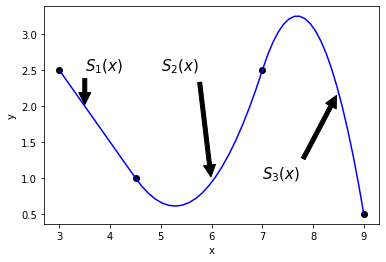

In [ ]:
x = [3, 4.5, 7, 9]
y = [2.5,1.0,2.5,0.5]
plt.plot(x,y, "ko")
plt.plot(np.linspace(3,4.5,20,endpoint=True),
         S1(np.linspace(3,4.5,20,endpoint=True)), "b-")
plt.annotate(r"$S_1(x)$", xy=(3.5,S1(3.5)), xytext=(3.5, 2.5),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.plot(np.linspace(4.5,7,20,endpoint=True),
         S2(np.linspace(4.5,7,20,endpoint=True)), "b-")
plt.annotate(r"$S_2(x)$", xy=(6.0,S2(6.0)), xytext=(5.0, 2.5),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.plot(np.linspace(7.0,9.0,20,endpoint=True),
         S3(np.linspace(7.0,9.0,20,endpoint=True)), "b-")
plt.annotate(r"$S_3(x)$", xy=(8.5,S3(8.5)), xytext=(7.0, 1.0),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Ejemplo** Construya un spline cúbico natural que pase por los puntos $(1,2),(2,3)$ y $(3,5)$.

$$S_i(x_i) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + d_i$$

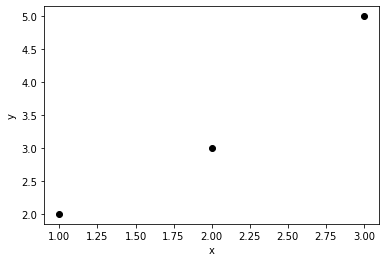

In [ ]:
x = [1, 2, 3]
y = [2,3,5]
plt.plot(x,y, "ko")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Paso 1**: Para el intervalo $ [1,2]$ y $ [2,3]$

se tiene

$$\begin{align*}
S_1(1) &= a_1(x-1)^3 + b_1(x-1)^2 + c_1(x-1) + d_1 \,; [1,2]\\
\end{align*}$$

**Paso 2**: Para el intervalo $ [2,3]$ y $ [3,5]$

$$\begin{align*}
S_2(2) &=a_2(x-2)^3 + b_2(x-2)^2 + c_2(x-2) + d_2 \,; [2,3]\\
\end{align*}$$

**Paso 3**: El sistema anterior tiene ocho coeficientes por determinar, por lo tanto se requieren de ocho condiciones. Cuatro de ellas surgen del hecho de que los splines deben concordar con los datos en los nodos.

$$\begin{align*}
d_1 &= f(1)=2\\
d_1 + b_1 + c_1 + a_1 &= f(2)=3\\
d_2 &= f(2)=3\\
d_2 + c_2 + b_2 + a_2 &= f(3)=5\\
\end{align*}$$

**Paso 4**: Dos condiciones más surgen del hecho de que $S'_1(2) = S'_2(2)$ y $S''_1(2) = S''_2(2)$

$$\begin{align*}
S'_i(x_i)&=3a_i(x-x_i)^2 + 2b_i(x-x_i)+c_i\\
S''_i(x_i)&=6a_i(x-x_i)+2b_i
\end{align*}$$

> Para $S'_1(2) = S'_2(2)$

$$3a_1+2b_1+c_1 = c_2$$

> Para $S''_1(2) = S''_2(2)$

$$2b_1 + 6a_1 = 2b_2$$

**Paso 5**: Las dos condiciones finales provienen de las condiciones de frontera natural.

> Para $S''_1(1)=0$

$$2b_1 = 0$$

> Para $S''_2(3) = 0$

$$2b_1+6a_1 = 0$$



**Paso 6**: Las ecuaciones a resolver son
$$\begin{align*}
S_1(x) &= a_1(x-1)^3 + b_1(x-1)^2 + c_1(x-1) + d_1\\
S_2(x) &=a_2(x-2)^3 + b_2(x-2)^2 + c_2(x-2) + d_2 \\
d_1 &= f(1)=2\\
d_1 + c_1 + b_1 + a_1 &= f(2)=3\\
d_2 &= f(2)=3\\
d_2 + c_2 + b_2 + a_2 &= f(3)=5\\
3a_1+2b_1+c_1 &= c_2\\
2b_1 + 6a_1 &= 2b_2\\
2b_1 &= 0\\
2b_1+6a_1 &= 0
\end{align*}$$

$$\begin{align*}
S_1(x) &= \dfrac{1}{4}(x-1)^3 + \dfrac{3}{4}(x-1) + 2,\,\text{para }x\in[1,2]\\
S_2(x) &= -\dfrac{1}{4}(x-2)^3 + \dfrac{3}{4}(x-2)^2 + \dfrac{3}{2}(x-2) + 3,\,\text{para }x\in[2,3]
\end{align*}$$

In [ ]:
from scipy.interpolate import CubicSpline
x = np.array([1,2,3])
y = np.array([2,3,5])

S = CubicSpline(x,y,bc_type="natural")
S

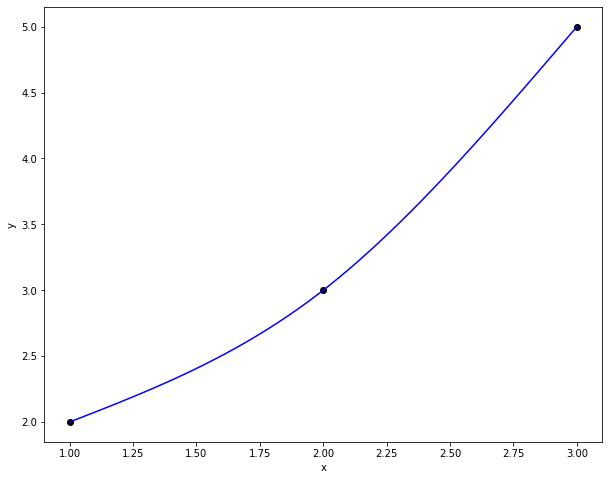

In [ ]:
xinter = np.linspace(1,3,endpoint=True)
plt.figure(figsize=(10,8))
plt.plot(x,y,"ko")
plt.plot(xinter,S(xinter),"b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
